### Wczytanie danych (dataframes) z Sqlite3

In [2]:

import pandas as pd
import numpy as np
import requests
import json
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3

conn = sqlite3.connect('PL_database.db')


dataframes = {}

table_names = ['PL_competitions', 'PL_teams', 'PL_standings', 'PL_TOPscorers', 'PL_matches']


for table in table_names:
    dataframes[table] = pd.read_sql(f"SELECT * FROM {table}", conn)


conn.close()


PL_competitions_df = dataframes['PL_competitions']
PL_teams_df = dataframes['PL_teams']
PL_competitions_standings_df = dataframes['PL_standings']
PL_competitions_TOPScorers_df = dataframes['PL_TOPscorers']
PL_matches_df = dataframes['PL_matches']



### Wizualizacja danych, korelacja oraz raport

### Czy gospodarze wygrywają więcej od gości? Pokazanie danych oraz ich wizualizacja

In [4]:
total_matches = PL_matches_df.shape[0]
home_win_percentage = (PL_matches_df['score.winner'].value_counts().get('HOME_TEAM', 0) / total_matches) * 100
away_win_percentage = (PL_matches_df['score.winner'].value_counts().get('AWAY_TEAM', 0) / total_matches) * 100
draw_percentage = (PL_matches_df['score.winner'].value_counts().get('DRAW', 0) / total_matches) * 100


print(f"Home Win Percentage: {home_win_percentage:.2f}%")
print(f"Away Win Percentage: {away_win_percentage:.2f}%")
print(f"Draw Percentage: {draw_percentage:.2f}%")

Home Win Percentage: 42.86%
Away Win Percentage: 28.57%
Draw Percentage: 28.57%


### Wizualizacja Win percentages

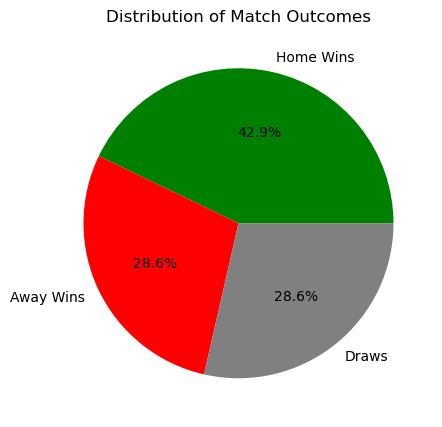

In [6]:
labels = ['Home Wins', 'Away Wins', 'Draws']
sizes = [home_win_percentage, away_win_percentage, draw_percentage]
colors = ['green', 'red', 'grey']

plt.figure(figsize=(5, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors)
plt.title("Distribution of Match Outcomes")
plt.show()

### Pokazanie korelacji na podstawie danych PL_competitions_standings_df - liczby oraz wizualizacja

                  points       won      draw      lost  goalsFor  \
points          1.000000  0.984294 -0.218527 -0.929045  0.720334   
won             0.984294  1.000000 -0.387363 -0.858790  0.735359   
draw           -0.218527 -0.387363  1.000000 -0.104675 -0.303003   
lost           -0.929045 -0.858790 -0.104675  1.000000 -0.621314   
goalsFor        0.720334  0.735359 -0.303003 -0.621314  1.000000   
goalsAgainst   -0.805041 -0.788522  0.154499  0.776982 -0.303746   
goalDifference  0.947360  0.944454 -0.273208 -0.873338  0.761400   

                goalsAgainst  goalDifference  
points             -0.805041        0.947360  
won                -0.788522        0.944454  
draw                0.154499       -0.273208  
lost                0.776982       -0.873338  
goalsFor           -0.303746        0.761400  
goalsAgainst        1.000000       -0.848925  
goalDifference     -0.848925        1.000000  


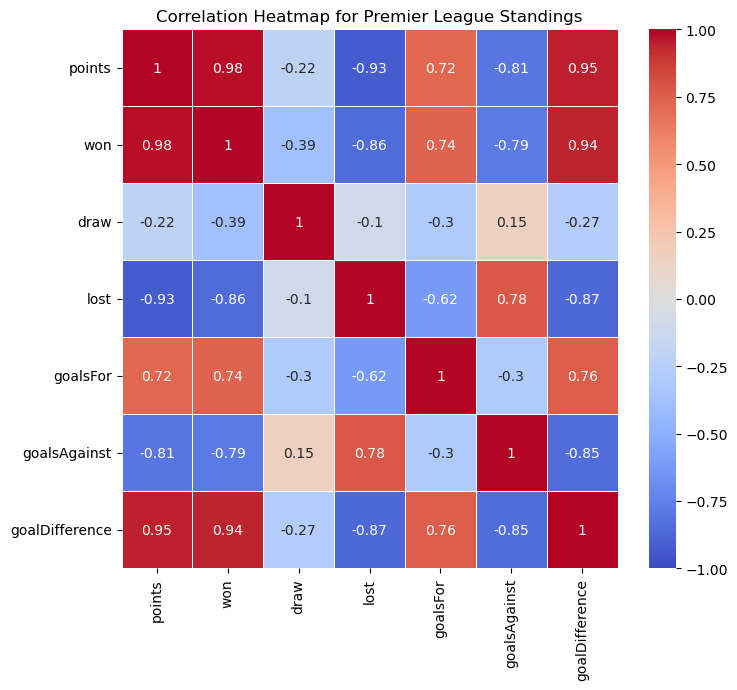

In [8]:
PL_standings_corr = PL_competitions_standings_df[['points', 'won', 'draw', 'lost', 'goalsFor', 'goalsAgainst', 'goalDifference']].corr()
print(PL_standings_corr)


plt.figure(figsize=(8, 7))
sns.heatmap(PL_standings_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)


plt.title("Correlation Heatmap for Premier League Standings")
plt.show()

### Podsumowanie

### Wykres pokazujący zależność pomiędzy ilością wygranych a liczbą punktów.

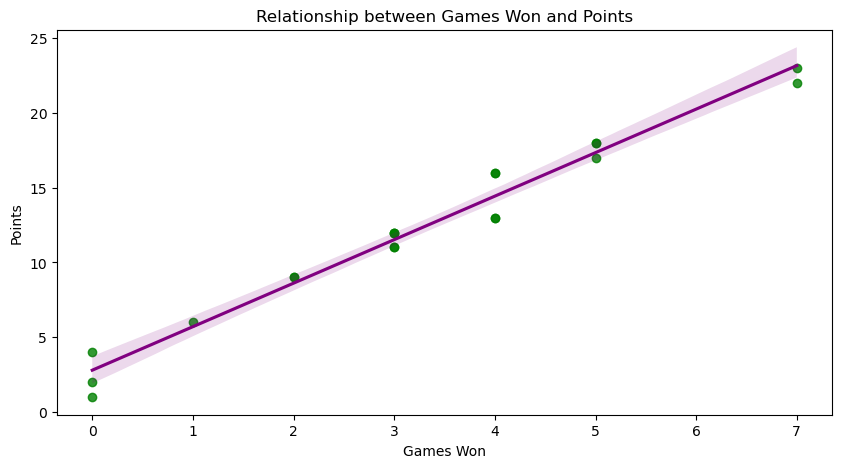

In [11]:
plt.figure(figsize=(10, 5))


sns.regplot(x='won', y='points', data=PL_competitions_standings_df, scatter_kws={'color': 'green'}, line_kws={'color': 'purple'})

plt.title("Relationship between Games Won and Points")
plt.xlabel("Games Won")
plt.ylabel("Points")
plt.show()

### Pogrupowanie względem winner.name oraz policzenie ilości wygranych turniejów

In [13]:
PL_wins_Series = PL_competitions_df.groupby('winner.name')['winner.name'].count()
PL_wins_df = pd.DataFrame(PL_wins_Series)
PL_wins_df.rename(columns={'winner.name': 'Wins'}, inplace=True)
PL_wins_df.sort_values('Wins', ascending = False,  inplace = True)
PL_wins_df

,Wins
winner.name,
Manchester United FC,13
Manchester City FC,7
Chelsea FC,5
Arsenal FC,4
Blackburn Rovers FC,1
Leeds United FC,1
Leicester City FC,1
Liverpool FC,1
